In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

sns.set()

In [2]:
df_customers = pd.read_csv('customers.csv', index_col=0)
df_customers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [4]:
df_customers.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df_customers.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


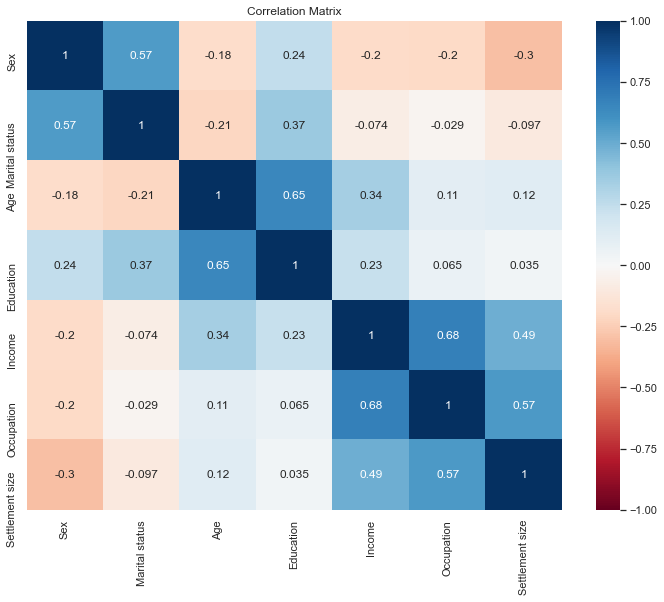

In [6]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_customers.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Income')

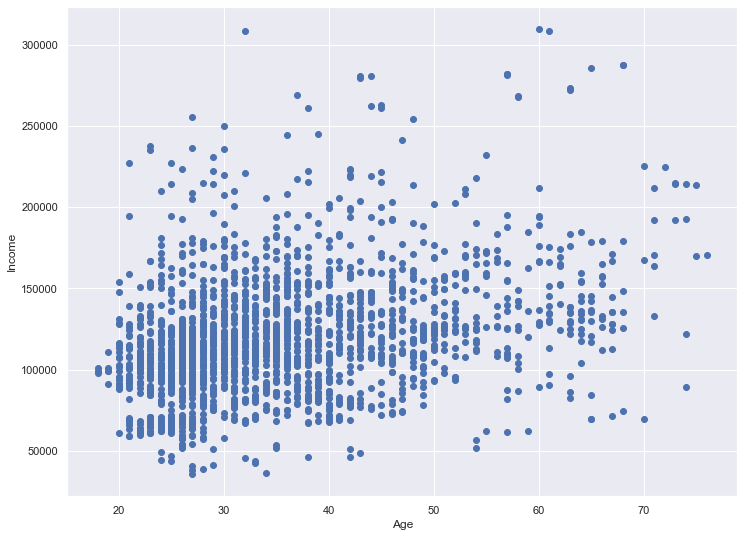

In [7]:
plt.figure(figsize=(12, 9))
# plt.scatter(df_customers.iloc[:, 2], df_customers.iloc[:, 4])
plt.scatter(df_customers['Age'], df_customers['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [8]:
scaler = StandardScaler()
customers_std = scaler.fit_transform(df_customers)

In [9]:
customers_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

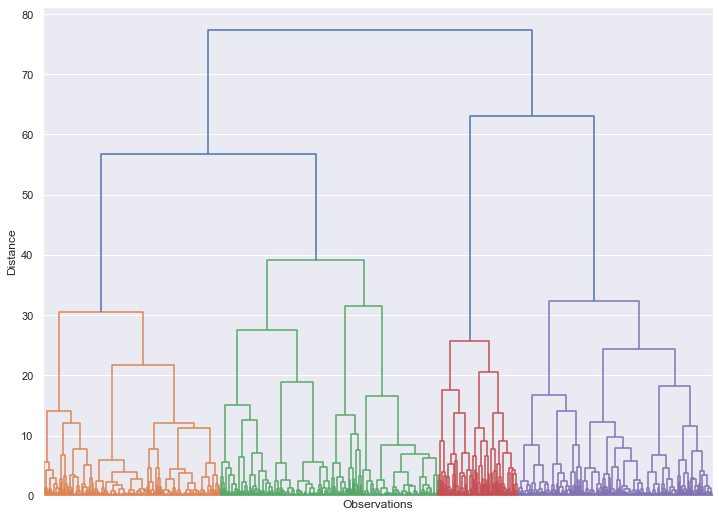

In [10]:
h_cluster = linkage(customers_std, method='ward')

plt.figure(figsize=(12, 9))
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(h_cluster,
           show_leaf_counts=False,
           no_labels=True)
plt.show()

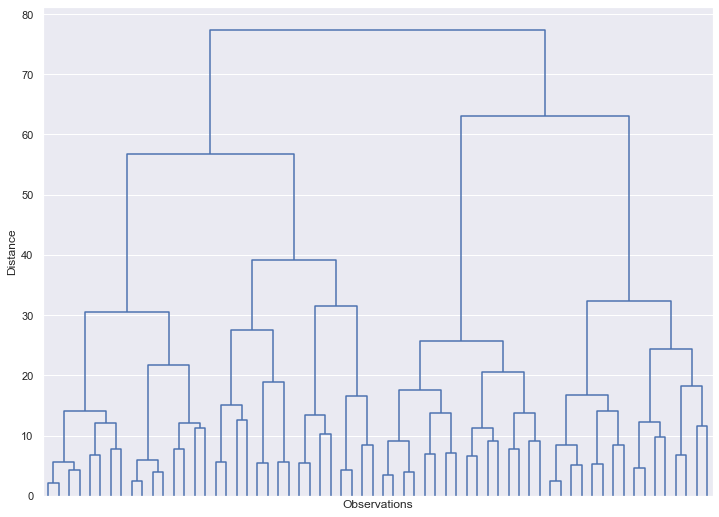

In [17]:
plt.figure(figsize=(12, 9))
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(h_cluster,
           show_leaf_counts=False,
           no_labels=True,
           color_threshold=0,
           truncate_mode='level',
           p=5)
plt.show()

In [14]:
customers_std_df = pd.DataFrame(customers_std)

results = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customers_std_df)
    results.append(kmeans.inertia_)

In [15]:
results

[14000.0,
 10514.568324257123,
 8632.96374735268,
 7169.911268212875,
 6406.961350264984,
 5881.4115835195735,
 5476.162737589886,
 5013.822681574257,
 4659.3139865553285,
 4304.798561872286]

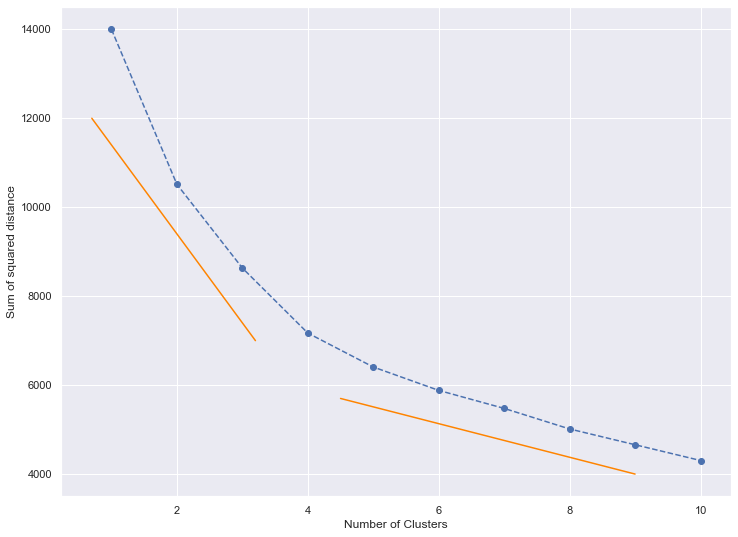

In [18]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,11), results, marker='o', linestyle='--')
plt.plot([0.7, 3.2], [12000, 7000], color='#FF8400')
plt.plot([4.5, 9], [5700, 4000], color='#FF8400')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customers_std_df)

KMeans(n_clusters=4, random_state=42)

In [20]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Segment'] = kmeans.labels_
df_customers_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


In [21]:
df_customers_analysis = df_customers_kmeans.groupby('Segment').mean().round(3)
df_customers_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.502,0.692,55.703,2.129,158338.422,1.129,1.110
1,0.353,0.019,35.578,0.747,97859.853,0.329,0.043
2,0.030,0.174,35.635,0.733,141218.249,1.272,1.523
3,0.854,0.997,28.963,1.068,105759.119,0.634,0.423


In [22]:
df_customers_analysis['Count'] = df_customers_kmeans[['Segment', 'Sex']].groupby('Segment').count()
df_customers_analysis['%'] = df_customers_analysis['Count'] / df_customers_analysis['Count'].sum()
df_customers_analysis.rename(index={
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
}, inplace=True)

df_customers_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Count,%
Segment,,,,,,,,,
well-off,0.502,0.692,55.703,2.129,158338.422,1.129,1.110,263,0.1315
fewer-opportunities,0.353,0.019,35.578,0.747,97859.853,0.329,0.043,462,0.2310
standard,0.030,0.174,35.635,0.733,141218.249,1.272,1.523,570,0.2850
career-focused,0.854,0.997,28.963,1.068,105759.119,0.634,0.423,705,0.3525


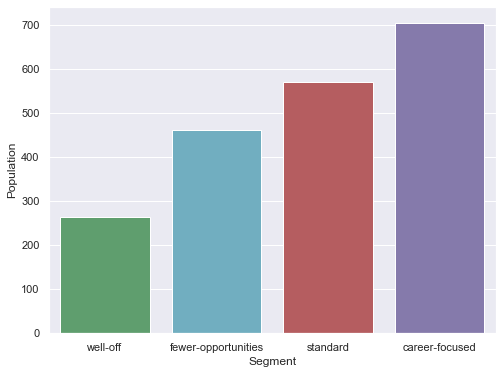

In [23]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_customers_analysis, x=df_customers_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

In [24]:
df_customers_kmeans['Segment'] = df_customers_kmeans['Segment'].map({
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
})
df_customers_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,well-off
100000002,1,1,22,1,150773,1,2,career-focused
100000003,0,0,49,1,89210,0,0,fewer-opportunities
100000004,0,0,45,1,171565,1,1,standard
100000005,0,0,53,1,149031,1,1,standard
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,fewer-opportunities
100001997,1,1,27,1,117744,1,0,career-focused
100001998,0,0,31,0,86400,0,0,fewer-opportunities


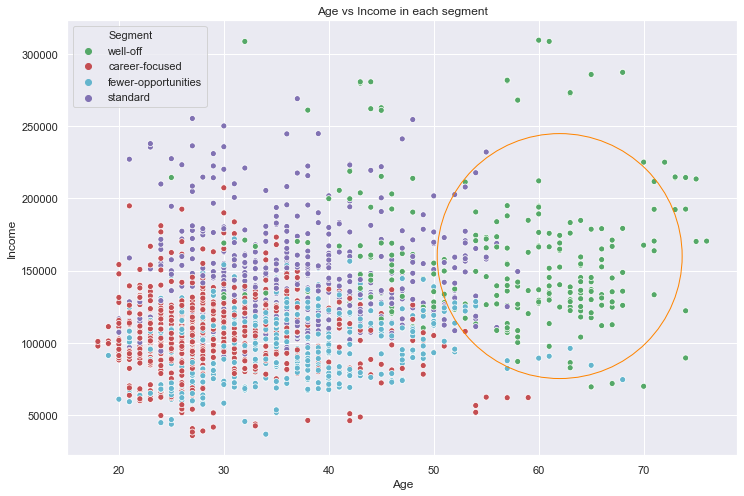

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_customers_kmeans['Age'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(62, 160000 , s=60000, facecolors='none', edgecolors='#FF8400' ) 
plt.title('Age vs Income in each segment')
plt.show()

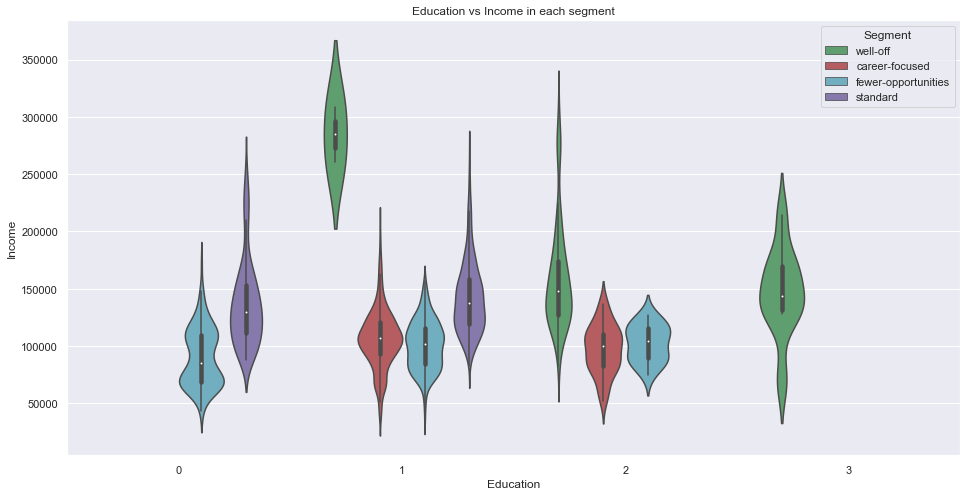

In [26]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    x=df_customers_kmeans['Education'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.title('Education vs Income in each segment')
plt.show()

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customers_std)

pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

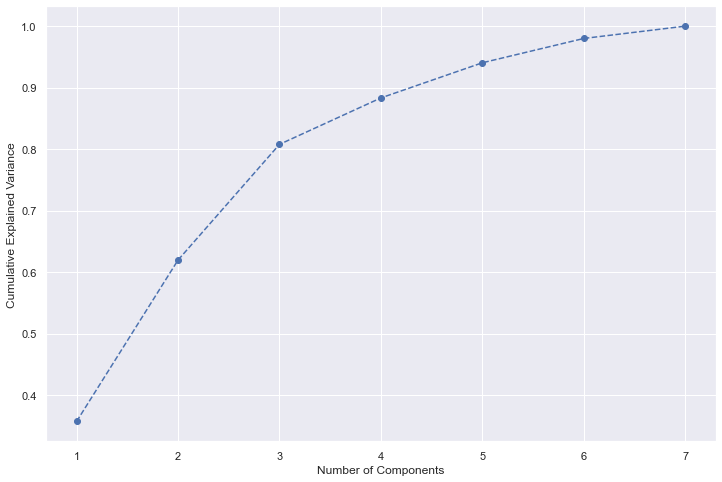

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [29]:
pca = PCA(n_components=3)
pca.fit(customers_std)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df_customers.columns.values,
    index=['component 1', 'component 2', 'component 3'])

df_pca_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.3147,-0.1917,0.3261,0.1568,0.5245,0.4921,0.4648
component 2,0.4580,0.5126,0.3122,0.6398,0.1247,0.0147,-0.0696
component 3,-0.2930,-0.4420,0.6095,0.2756,-0.1657,-0.3955,-0.2957


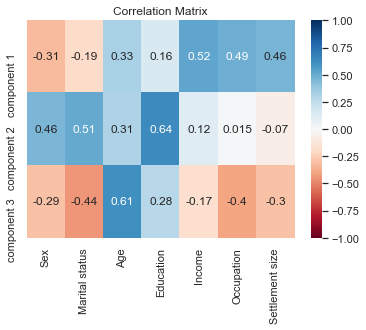

In [30]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

In [41]:
pca_scores = pca.transform(customers_std)

results = []

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standardized by default
    results.append(kmeans_pca.inertia_)

In [42]:
results

[11307.571135945915,
 7831.498055436468,
 5954.591095084344,
 4543.147101736677,
 3834.8501342328213,
 3317.5339786467093,
 2871.2216505525435,
 2563.5103396471236,
 2270.9749110030375,
 2010.0461962640693]

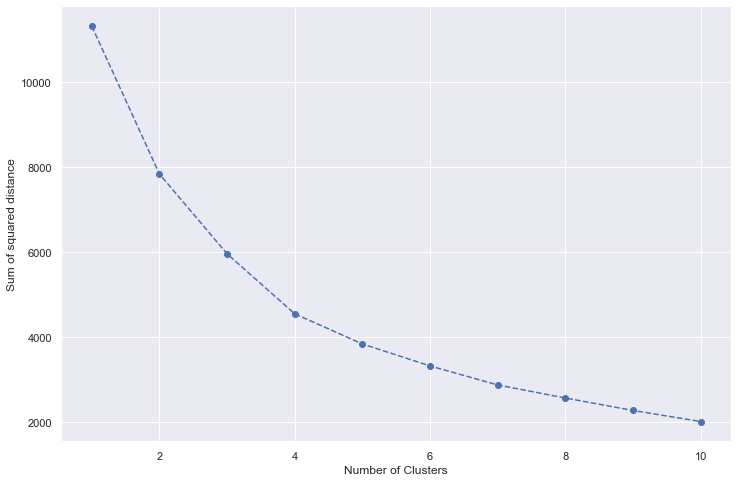

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1,11), results, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [44]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [45]:
df_segm_pca = pd.concat([df_customers.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-3:] = ['component 1', 'component 2', 'component 3']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [46]:
df_segm_pca.to_csv("customer_segment_pca.csv", encoding='utf-8', index=False)

In [47]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3
K-means PCA,,,,,,,,,,
0,0.3072,0.0980,35.3834,0.7669,93566.1024,0.2484,0.0392,-1.0488,-0.8921,1.0104
1,0.0274,0.1675,35.7009,0.7316,141489.7214,1.2667,1.4752,1.3672,-1.0502,-0.2480
2,0.9004,0.9654,28.9134,1.0620,107551.9466,0.6768,0.4401,-1.1069,0.7064,-0.7783
3,0.5057,0.6882,55.7224,2.1293,158391.6768,1.1293,1.1103,1.7062,2.0317,0.8388


In [ ]:
Segment 0: low career and experience values with high education and lifestyle values.
Label: Standard
Segment 1: high career but low education, lifestyle and experience
Label: Career focused
Segment 2: low career, education and lifestyle, but high life experience
Label: Fewer opportunities
Segment 3: high career, education and lifestyle as well as high life experience
Label: Well-off

In [48]:
df_segm_pca_analysis['Count'] = df_segm_pca[['K-means PCA', 'Sex']].groupby(['K-means PCA']).count()
df_segm_pca_analysis['%'] = df_segm_pca_analysis['Count'] / df_segm_pca_analysis['Count'].sum()
df_segm_pca_analysis.rename(index={
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
}, inplace=True)

df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,Count,%
K-means PCA,,,,,,,,,,,,
standard,0.3072,0.0980,35.3834,0.7669,93566.1024,0.2484,0.0392,-1.0488,-0.8921,1.0104,459,0.2295
career-focused,0.0274,0.1675,35.7009,0.7316,141489.7214,1.2667,1.4752,1.3672,-1.0502,-0.2480,585,0.2925
fewer-opportunities,0.9004,0.9654,28.9134,1.0620,107551.9466,0.6768,0.4401,-1.1069,0.7064,-0.7783,693,0.3465
well-off,0.5057,0.6882,55.7224,2.1293,158391.6768,1.1293,1.1103,1.7062,2.0317,0.8388,263,0.1315


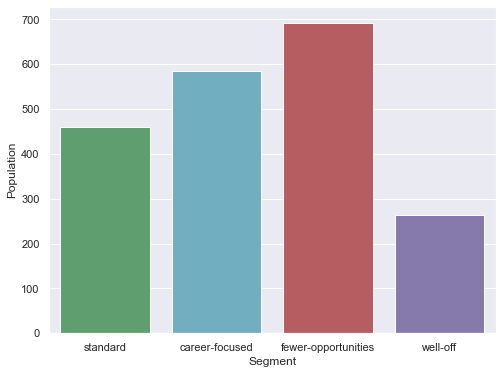

In [49]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

In [50]:
df_segm_pca['Segment'] = df_segm_pca['K-means PCA'].map({
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
})
df_segm_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA,Segment
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,fewer-opportunities
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,standard
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career-focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career-focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0,standard
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,fewer-opportunities
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0,standard
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,fewer-opportunities


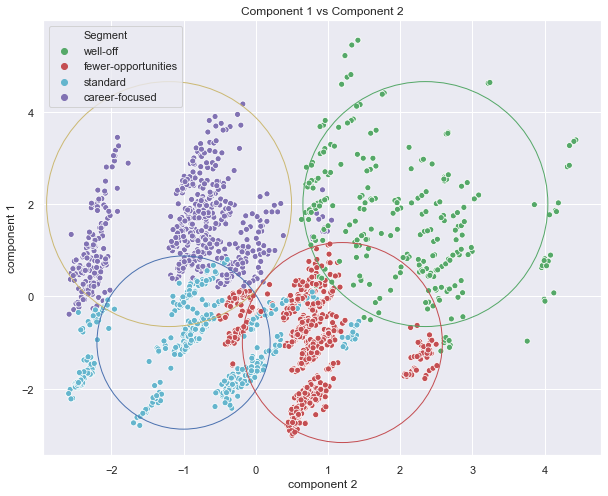

In [51]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 2'],
    y=df_segm_pca['component 1'],
    hue=df_segm_pca['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 2')
plt.show()